In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('C:/Users/admin/downloads/income.csv')
df.head(10)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [5]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])

scaler.fit(df[['Income($)']])
df[['Income($)']] = scaler.transform(df[['Income($)']])
df.head(10)

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


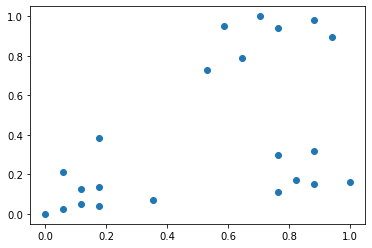

In [6]:
plt.scatter(df['Age'], df['Income($)'])

In [7]:
k_range = range(1, 11)
sse = []
for k in k_range:
    kmc = KMeans(n_clusters=k)
    kmc.fit(df[['Age', 'Income($)']])
    sse.append(kmc.inertia_)
sse

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.21055478995472496,
 0.1685851223602976,
 0.13781880133764024,
 0.10919063774844096,
 0.08305638380794388]

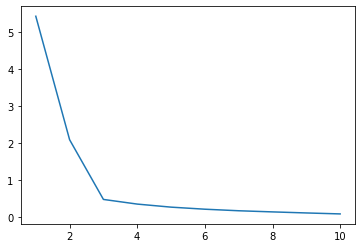

In [8]:
plt.xlabel = 'Number of Clusters'
plt.ylabel = 'Sum of Squared Errors'
plt.plot(k_range, sse)

In [9]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [10]:
y_predict = km.fit_predict(df[['Age', 'Income($)']])
y_predict

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [11]:
df['cluster'] = y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [12]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

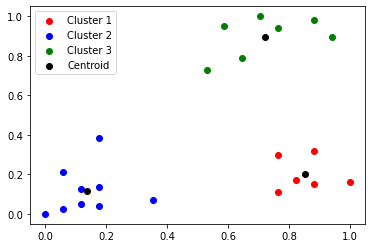

In [14]:
p1 = plt.scatter(df0['Age'], df0['Income($)'],color='red')
p2 = plt.scatter(df1['Age'], df1['Income($)'],color='blue')
p3 = plt.scatter(df2['Age'], df2['Income($)'],color='green')
c = plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')
plt.legend((p1, p2, p3, c),
          ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Centroid'))